In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [2]:
df_train = pd.read_csv('E:\\web_economics\\train.csv')
df_val = pd.read_csv('E:\\web_economics\\validation.csv')

## constant bidding -> Fajar

In [3]:
#constant bidding
bid_max = 300

data = pd.DataFrame(columns=['bid','clicks','imps','spent','CTR','CPC','CPM'])
lists = {'bid':[], 'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}
for bid in range(2, bid_max+2, 2):
    budget = 6250000.0
    imps = 0.0
    clicks = 0.0
    spent = 0.0
    for payprice, clicked in df_val[['payprice','click']].values:
        if budget < payprice:
            break
        if bid >= payprice:
            imps = imps + 1
            clicks = clicks + clicked
            budget = budget - payprice
            spent = spent + payprice
    ctr = ((clicks / imps) * 100).round(4).astype(str)
    cpm = ((spent / imps) * 1000).round(4).astype(str)
    cpc = (spent / clicks).round(4).astype(str)
    lists['bid'].append(bid)
    lists['clicks'].append(clicks)
    lists['imps'].append(imps)
    lists['spent'].append(spent)
    lists['ctr'].append(ctr)
    lists['cpc'].append(cpc)
    lists['cpm'].append(cpm)
    
data.bid = lists['bid']
data.clicks = lists['clicks']
data.imps = lists['imps']
data.spent = lists['spent']
data.CTR = lists['ctr']
data.CPC = lists['cpc']
data.CPM = lists['cpm']
data

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: divide by zero encountered in double_scalars


,bid,clicks,imps,spent,CTR,CPC,CPM
0,2,0.0,798.0,1165.0,0.0,inf,1459.8997
1,4,0.0,2133.0,6421.0,0.0,inf,3010.3141
2,6,8.0,9407.0,44552.0,0.085,5569.0,4736.0476
3,8,8.0,12051.0,64261.0,0.0664,8032.625,5332.4205
4,10,8.0,15966.0,102098.0,0.0501,12762.25,6394.7138
5,12,9.0,19572.0,143423.0,0.046,15935.8889,7327.9685
6,14,10.0,22622.0,184637.0,0.0442,18463.7,8161.8336
7,16,11.0,26289.0,241850.0,0.0418,21986.3636,9199.6653
8,18,13.0,30733.0,319572.0,0.0423,24582.4615,10398.334
9,20,15.0,45543.0,614257.0,0.0329,40950.4667,13487.4075


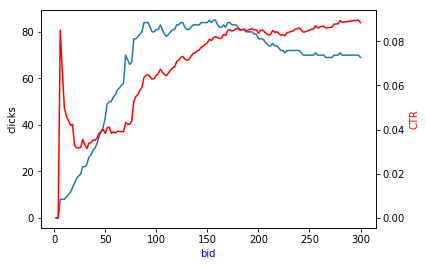

In [4]:
clicks = data[['clicks','bid']]
ctrs = data[['CTR','bid']]
ctrs = ctrs.astype(float)
clicks = clicks.astype(float)
fig, ax1 = plt.subplots()
ax1.plot(clicks['bid'],clicks['clicks'])
ax1.set_xlabel('bid',color='b')
ax1.set_ylabel('clicks')

ax2 = ax1.twinx()
ax2.plot(ctrs['bid'],ctrs['CTR'],color='r')
ax2.set_ylabel('CTR',color='r')
fig.savefig('constant_bid.png')
plt.show()

In [7]:
data.iloc[np.where(data.clicks == data.clicks.max())[0]]

,bid,clicks,imps,spent,CTR,CPC,CPM
75,152,85.0,105115.0,6249939.0,0.0809,73528.6941,59458.1078
77,156,85.0,104178.0,6249976.0,0.0816,73529.1294,59993.2423
78,158,85.0,103565.0,6249953.0,0.0821,73528.8588,60348.1195


## Random bidding -> Fajar

In [8]:
#random bidding
bid_max = 300

data = pd.DataFrame(columns=['upper_bound','clicks','imps','spent','CTR','CPC','CPM'])
lists = {'upper_bound':[], 'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}
for k in range(2, bid_max+2, 2):
    budget = 6250000.0
    imps = 0.0
    clicks = 0.0
    spent = 0.0
    for payprice,clicked in df_val[['payprice','click']].values:
        bid = randint(1, k)
        if budget < payprice:
            break
        if bid >= payprice:
            imps = imps + 1
            clicks = clicks + clicked
            budget = budget - payprice
            spent = spent + payprice
    ctr = ((clicks / imps) * 100).round(4).astype(str)
    cpm = ((spent / imps) * 1000).round(4).astype(str)
    cpc = (spent / clicks).round(4).astype(str)
    lists['upper_bound'].append(k)
    lists['clicks'].append(clicks)
    lists['imps'].append(imps)
    lists['spent'].append(spent)
    lists['ctr'].append(ctr)
    lists['cpc'].append(cpc)
    lists['cpm'].append(cpm)    

data.upper_bound = lists['upper_bound']
data.clicks = lists['clicks']
data.imps = lists['imps']
data.spent = lists['spent']
data.CTR = lists['ctr']
data.CPC = lists['cpc']
data.CPM = lists['cpm']
data

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in double_scalars


,upper_bound,clicks,imps,spent,CTR,CPC,CPM
0,2,0.0,571.0,711.0,0.0,inf,1245.1839
1,4,0.0,1046.0,2336.0,0.0,inf,2233.2696
2,6,2.0,3536.0,14642.0,0.0566,7321.0,4140.8371
3,8,2.0,5458.0,25600.0,0.0366,12800.0,4690.3628
4,10,3.0,7355.0,38562.0,0.0408,12854.0,5242.964
5,12,5.0,9284.0,54401.0,0.0539,10880.2,5859.651
6,14,5.0,11128.0,71912.0,0.0449,14382.4,6462.2574
7,16,7.0,12816.0,90774.0,0.0546,12967.7143,7082.8652
8,18,7.0,14652.0,113568.0,0.0478,16224.0,7751.0238
9,20,7.0,17100.0,150347.0,0.0409,21478.1429,8792.2222


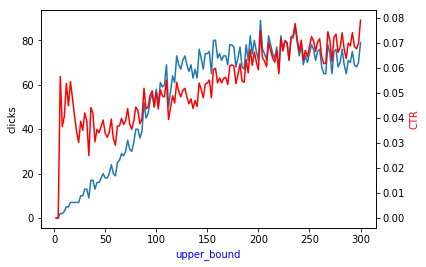

In [9]:
clicks = data[['clicks','upper_bound']]
ctrs = data[['CTR','upper_bound']]
ctrs = ctrs.astype(float)
clicks = clicks.astype(float)
fig, ax1 = plt.subplots()
ax1.plot(clicks['upper_bound'],clicks['clicks'])
ax1.set_xlabel('upper_bound',color='b')
ax1.set_ylabel('clicks')

ax2 = ax1.twinx()
ax2.plot(ctrs['upper_bound'],ctrs['CTR'],color='r')
ax2.set_ylabel('CTR',color='r')
fig.savefig('random_bid.png')
plt.show()

In [11]:
data.iloc[np.where(data.clicks == data.clicks.max())[0]]

,upper_bound,clicks,imps,spent,CTR,CPC,CPM
100,202,89.0,119171.0,6249890.0,0.0747,70223.4831,52444.7223
